<h4>Importing required libraries</h4>

In [16]:
%matplotlib inline

import geopandas 
import numpy as np
import pandas as pd

<h4>Loading point shapefile containing the Terrain Ruggedness Index</h4>

In [2]:
tri = geopandas.read_file("../../Data/tl_2018_06_bg_point_tri.shp")

<h4>Taking a peek at the loaded data from shapefile</h4>

In [3]:
tri.head()

,FID_tl_201,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,INTPTLATN,INTPTLONN,FID_tri_po,Id,gridcode,geometry
0,16659,06,073,010009,4,060730100094,Block Group 4,G5030,S,641527.0,0.0,+32.5447420,-117.0382219,32.544742,-117.038222,1206760,1206760,74940,POINT (-117.03822 32.54474)
1,15247,06,073,010009,1,060730100091,Block Group 1,G5030,S,1766491.0,532114.0,+32.5453695,-117.0559349,32.545369,-117.055935,1206758,1206758,35384,POINT (-117.05593 32.54537)
2,16951,06,073,010009,2,060730100092,Block Group 2,G5030,S,422248.0,0.0,+32.5470477,-117.0518207,32.547048,-117.051821,1206758,1206758,35384,POINT (-117.05182 32.54705)
3,9114,06,073,010109,1,060730101091,Block Group 1,G5030,S,11426699.0,904220.0,+32.5494881,-117.0884184,32.549488,-117.088418,1206754,1206754,116151,POINT (-117.08842 32.54949)
4,16952,06,073,010009,3,060730100093,Block Group 3,G5030,S,699839.0,0.0,+32.5530043,-117.0544096,32.553004,-117.054410,1206334,1206334,36000,POINT (-117.05441 32.55300)


<h4>Loading a visualization of the data to make sure the shapefile loaded correctly</h4>

<AxesSubplot:>

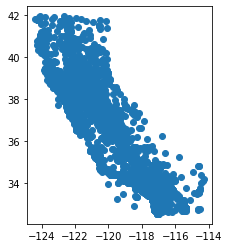

In [4]:
tri.plot()

<h4>Loading Block Groups shapefile</h4>

In [5]:
bg = geopandas.read_file("../../Data/tl_2018_06_bg.zip")

<h4>Taking a peek at the loaded block groups data</h4>

In [6]:
bg.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,002100,1,060290021001,Block Group 1,G5030,S,405200,0,+35.3646355,-118.9967818,"POLYGON ((-119.00072 35.36158, -118.99903 35.3..."
1,06,029,002100,2,060290021002,Block Group 2,G5030,S,229057,0,+35.3592017,-118.9974486,"POLYGON ((-119.00092 35.35921, -119.00091 35.3..."
2,06,029,002100,3,060290021003,Block Group 3,G5030,S,547260,0,+35.3556693,-118.9990812,"POLYGON ((-119.00300 35.35244, -119.00300 35.3..."
3,06,029,002200,1,060290022001,Block Group 1,G5030,S,335352,0,+35.3667005,-118.9837235,"POLYGON ((-118.98869 35.36755, -118.98775 35.3..."
4,06,029,002200,2,060290022002,Block Group 2,G5030,S,292740,0,+35.3631225,-118.9845714,"POLYGON ((-118.98857 35.36303, -118.98857 35.3..."


<h4>Checking coordinate system of both datasets</h4>

In [7]:
print(bg.crs)
print(tri.crs)

epsg:4269
epsg:4269


<h4>Checking bounds of both datasets</h4>

In [8]:
print(tri.total_bounds)
print(bg.total_bounds)

[-124.3754086   32.544742  -114.2945493   41.9466483]
[-124.482003   32.528832 -114.131211   42.009503]


<h4>Performing spatial join of TRI data with block groups using contains operation</h4>

In [9]:
joined = geopandas.sjoin(tri, bg, how="right", op='intersects')

<h4>Peeking at the top rows of the joined data</h4>

In [10]:
joined.head()

,index_left,FID_tl_201,STATEFP_x,COUNTYFP_x,TRACTCE_x,BLKGRPCE_x,GEOID_x,NAMELSAD_x,MTFCC_x,FUNCSTAT_x,...,BLKGRPCE_y,GEOID_y,NAMELSAD_y,MTFCC_y,FUNCSTAT_y,ALAND_y,AWATER_y,INTPTLAT_y,INTPTLON_y,geometry
0,13323.0,1.0,06,029,002100,1,060290021001,Block Group 1,G5030,S,...,1,060290021001,Block Group 1,G5030,S,405200,0,+35.3646355,-118.9967818,"POLYGON ((-119.00072 35.36158, -118.99903 35.3..."
1,13309.0,2.0,06,029,002100,2,060290021002,Block Group 2,G5030,S,...,2,060290021002,Block Group 2,G5030,S,229057,0,+35.3592017,-118.9974486,"POLYGON ((-119.00092 35.35921, -119.00091 35.3..."
2,13297.0,3.0,06,029,002100,3,060290021003,Block Group 3,G5030,S,...,3,060290021003,Block Group 3,G5030,S,547260,0,+35.3556693,-118.9990812,"POLYGON ((-119.00300 35.35244, -119.00300 35.3..."
3,13331.0,4.0,06,029,002200,1,060290022001,Block Group 1,G5030,S,...,1,060290022001,Block Group 1,G5030,S,335352,0,+35.3667005,-118.9837235,"POLYGON ((-118.98869 35.36755, -118.98775 35.3..."
4,13319.0,5.0,06,029,002200,2,060290022002,Block Group 2,G5030,S,...,2,060290022002,Block Group 2,G5030,S,292740,0,+35.3631225,-118.9845714,"POLYGON ((-118.98857 35.36303, -118.98857 35.3..."


<h4>Filtering columns to only include the GEOID and TRI value</h4>

In [11]:
joined['tri'] = joined.apply(lambda x: x.gridcode/1000, axis=1)
joined = joined[['GEOID_x', 'tri']].rename(columns={"GEOID_x": "GEOID"})

<h4>Peeking at the top rows of the final dataframe</h4>

In [12]:
joined.head()

,GEOID,tri
0,060290021001,12.767
1,060290021002,12.767
2,060290021003,4.000
3,060290022001,29.000
4,060290022002,16.492


<h4>Checking how many block groups have no tri data</h4>

In [13]:
joined.isna().sum()

GEOID    5
tri      5
dtype: int64

In [14]:
joined = joined.dropna()

<h4>Writing output to CSV</h4>

In [15]:
joined.to_csv('tri_bg.csv', index=False)  